In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline

from scipy import stats

%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_excel("Price Prediction Dataset.xlsx")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07 00:00:00,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


# Exploring the dataset

In [3]:
# Detailed info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48869 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48873 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
#dataset description
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


# Exploring the dataset

In [5]:
# Top 10 famous hotels
df['name'].value_counts()[:10]

Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Beautiful Brooklyn Brownstone                  8
Private room in Brooklyn                       8
Name: name, dtype: int64

In [6]:
# Most desired room type
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

People prefer entire apartments/home or private rooms instead of sharing rooms

In [7]:
# Top neighbourhood groups
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [8]:
# Top neighbourhood 
df['neighbourhood'].value_counts()[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [9]:
# Top Most Expensive Hotels
df[['name','price','neighbourhood']].sort_values(by = 'price',ascending=False)[:10]

,name,price,neighbourhood
9151,Furnished room in Astoria apartment,10000,Astoria
17692,Luxury 1 bedroom apt. -stunning Manhattan views,10000,Greenpoint
29238,1-BR Lincoln Center,10000,Upper West Side
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999,Lower East Side
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999,Lower East Side
6530,Spanish Harlem Apt,9999,East Harlem
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500,Tribeca
4377,Film Location,8000,Clinton Hill
29662,East 72nd Townhouse by (Hidden by Airbnb),7703,Upper East Side
42523,70' Luxury MotorYacht on the Hudson,7500,Battery Park City


In [10]:
# Top Most Cheapest Hotels
df[['name','price','neighbourhood']].sort_values(by = 'price',ascending=True)[0:20]

,name,price,neighbourhood
25796,Cozy yet spacious private brownstone bedroom,0,Bedford-Stuyvesant
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",0,Bushwick
25433,â˜…Hostel Style Room | Ideal Traveling Buddiesâ˜…,0,East Morrisania
25753,"Sunny, Quiet Room in Greenpoint",0,Greenpoint
23161,"Huge Brooklyn Brownstone Living, Close to it all.",0,Bedford-Stuyvesant
25795,Contemporary bedroom in brownstone with nice view,0,Bedford-Stuyvesant
26841,Coliving in Brooklyn! Modern design / Shared room,0,Bushwick
25778,Modern apartment in the heart of Williamsburg,0,Williamsburg
25794,Spacious comfortable master bedroom with nice ...,0,Bedford-Stuyvesant
26866,Best Coliving space ever! Shared room.,0,Bushwick


There are some prices of the hotels which are 0. We need to handle these rows in later steps

In [11]:
# Most Expensive Neighbourhood Groups
df.groupby(by='neighbourhood_group').sum()['price'].sort_values(ascending=False)

neighbourhood_group
Manhattan        4264527
Brooklyn         2500600
Queens            563867
Bronx              95459
Staten Island      42825
Name: price, dtype: int64

In [12]:
# Checking the minimum nights column
df['minimum_nights'].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36],
      dtype=int64)

In [13]:
# Number of reviews column
df['number_of_reviews'].unique()[:20]

array([  9,  45,   0, 270,  74,  49, 430, 118, 160,  53, 188, 167, 113,
        27, 148, 198, 260, 130,  39,  71], dtype=int64)

In [14]:
# Top 10 hotels with most reviews
df.sort_values(by = 'number_of_reviews',ascending=False)[['name','number_of_reviews']][:10]

,name,number_of_reviews
11759,Room near JFK Queen Bed,629
2031,Great Bedroom in Manhattan,607
2030,Beautiful Bedroom in Manhattan,597
2015,Private Bedroom in Manhattan,594
13495,Room Near JFK Twin Beds,576
10623,Steps away from Laguardia airport,543
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,540
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,510
4870,Private brownstone studio Brooklyn,488
471,LG Private Room/Family Friendly,480


#  Visualising the data

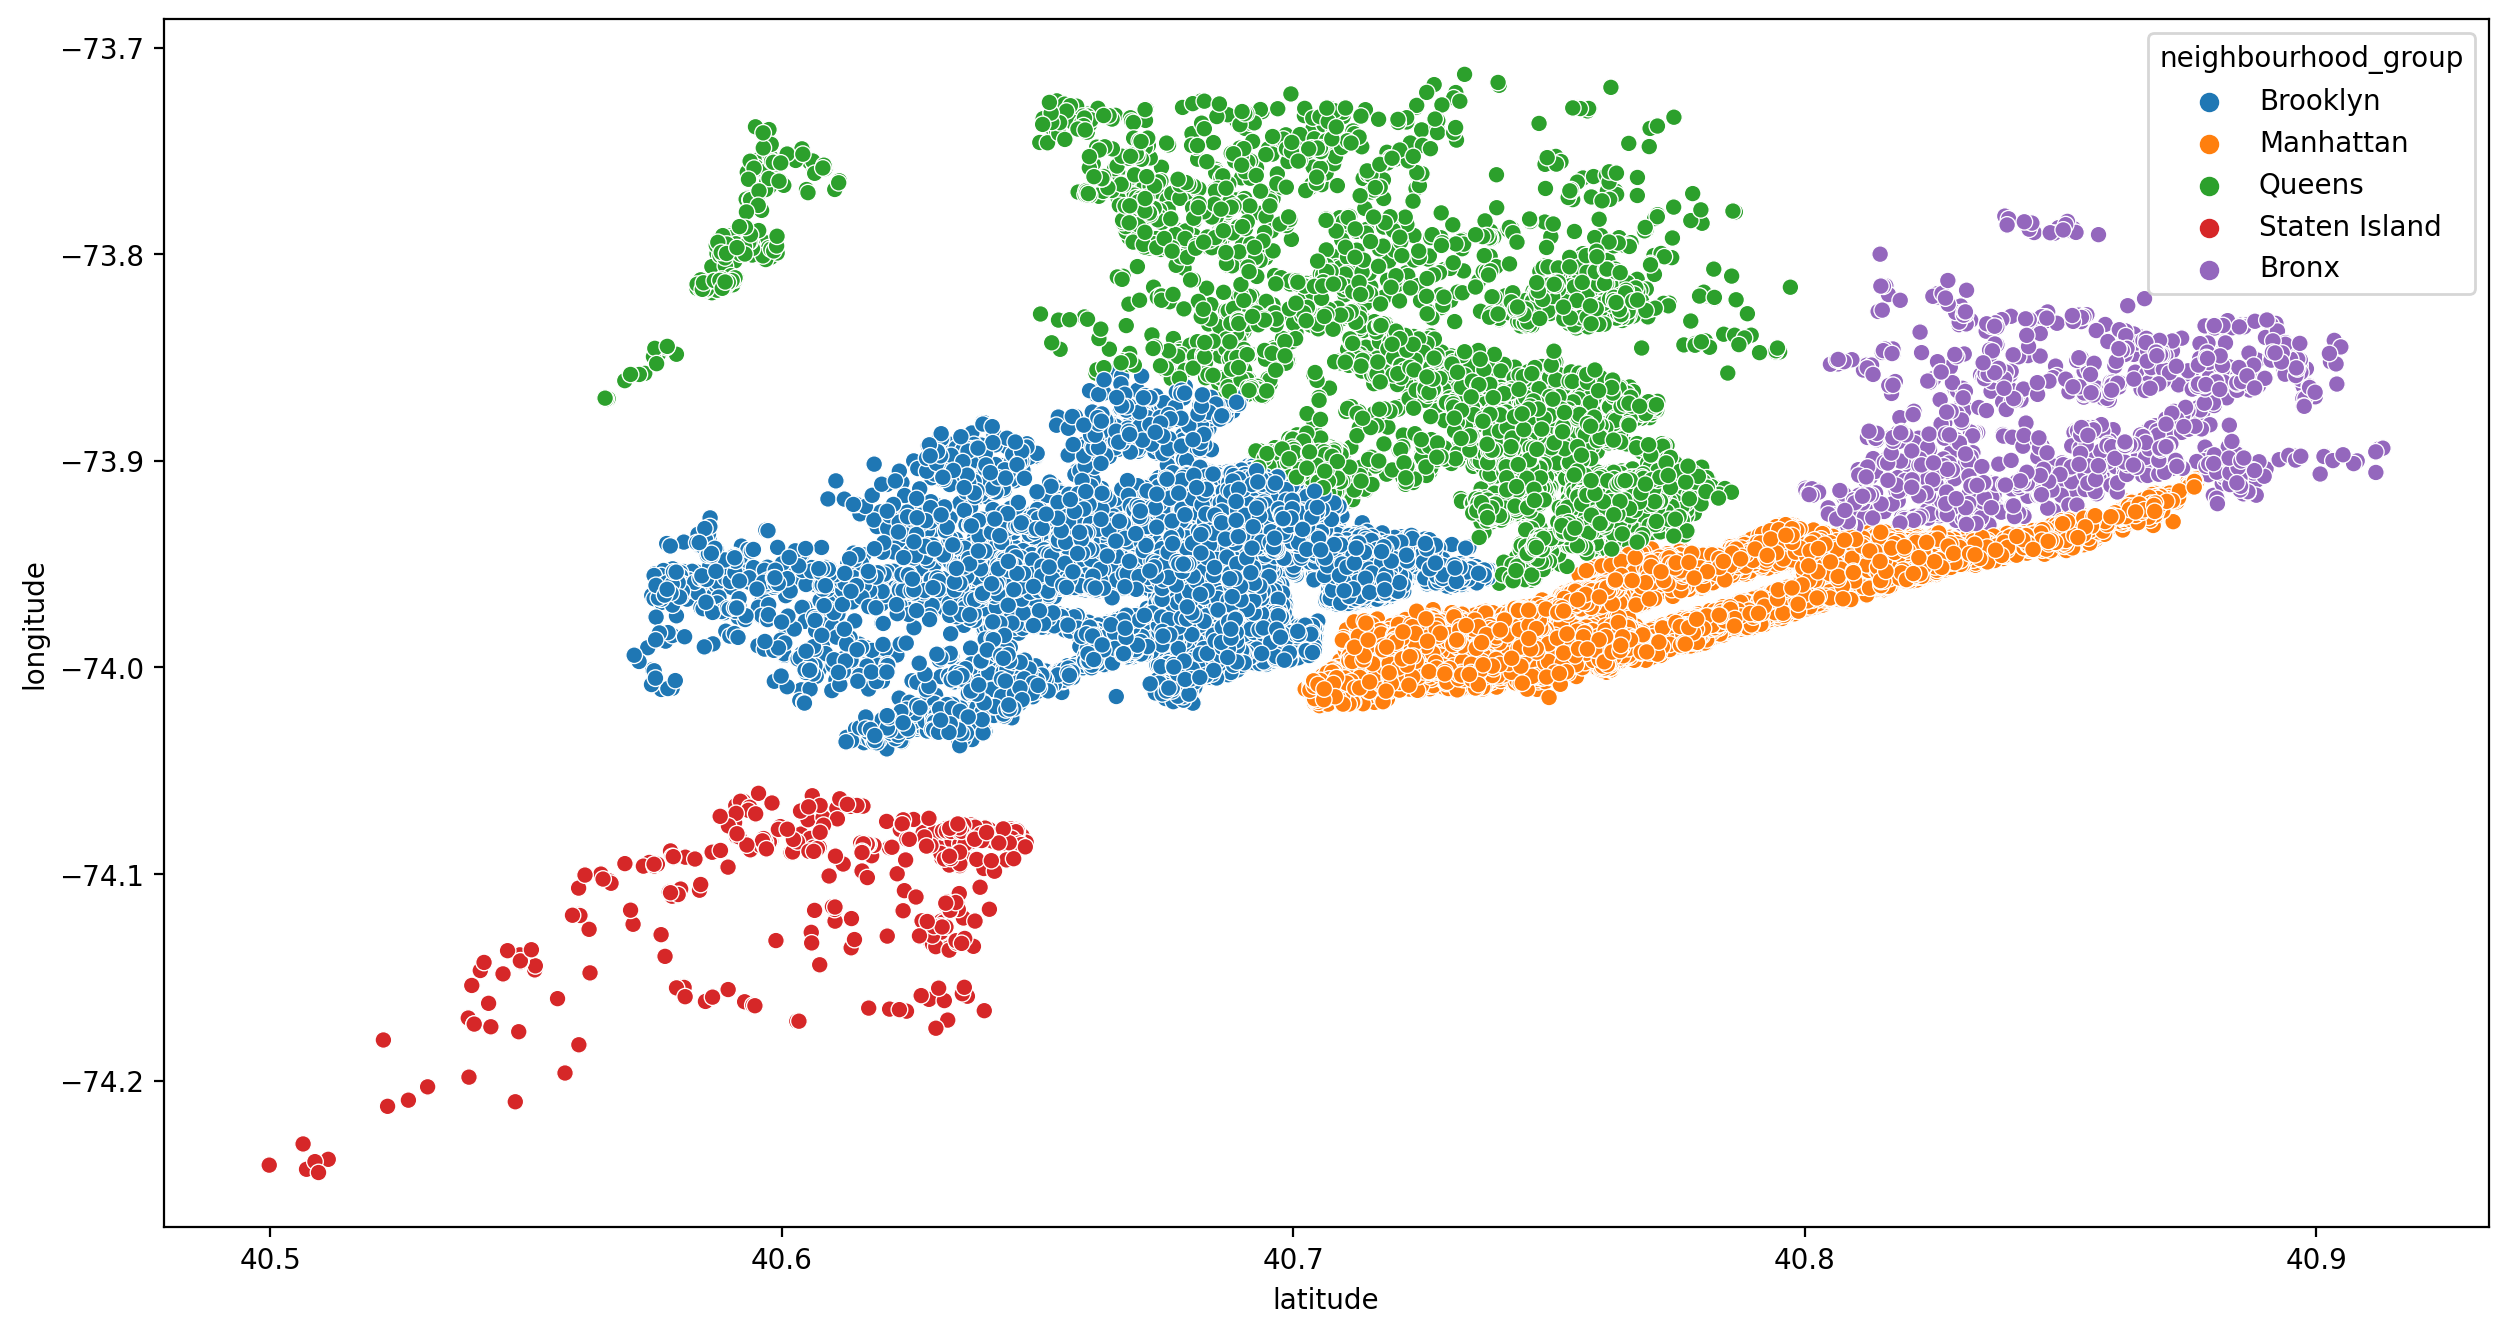

In [15]:
# Visualizing neighbourhood group
plt.figure(figsize=(15,8),dpi = 200)
sns.scatterplot(x = 'latitude',y='longitude',data = df,hue = 'neighbourhood_group')
plt.show()

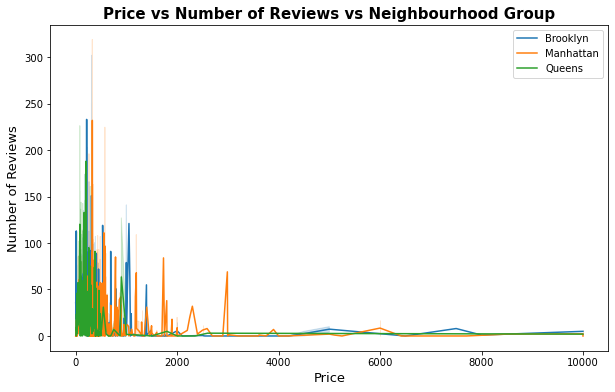

In [16]:
# Price per Neighbourhood Group
plt.figure(figsize=(10,6))

sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Brooklyn'],
             label='Brooklyn')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Manhattan'],
             label='Manhattan')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Queens'],
             label='Queens')

plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood Group",size=15, weight='bold')
plt.show()

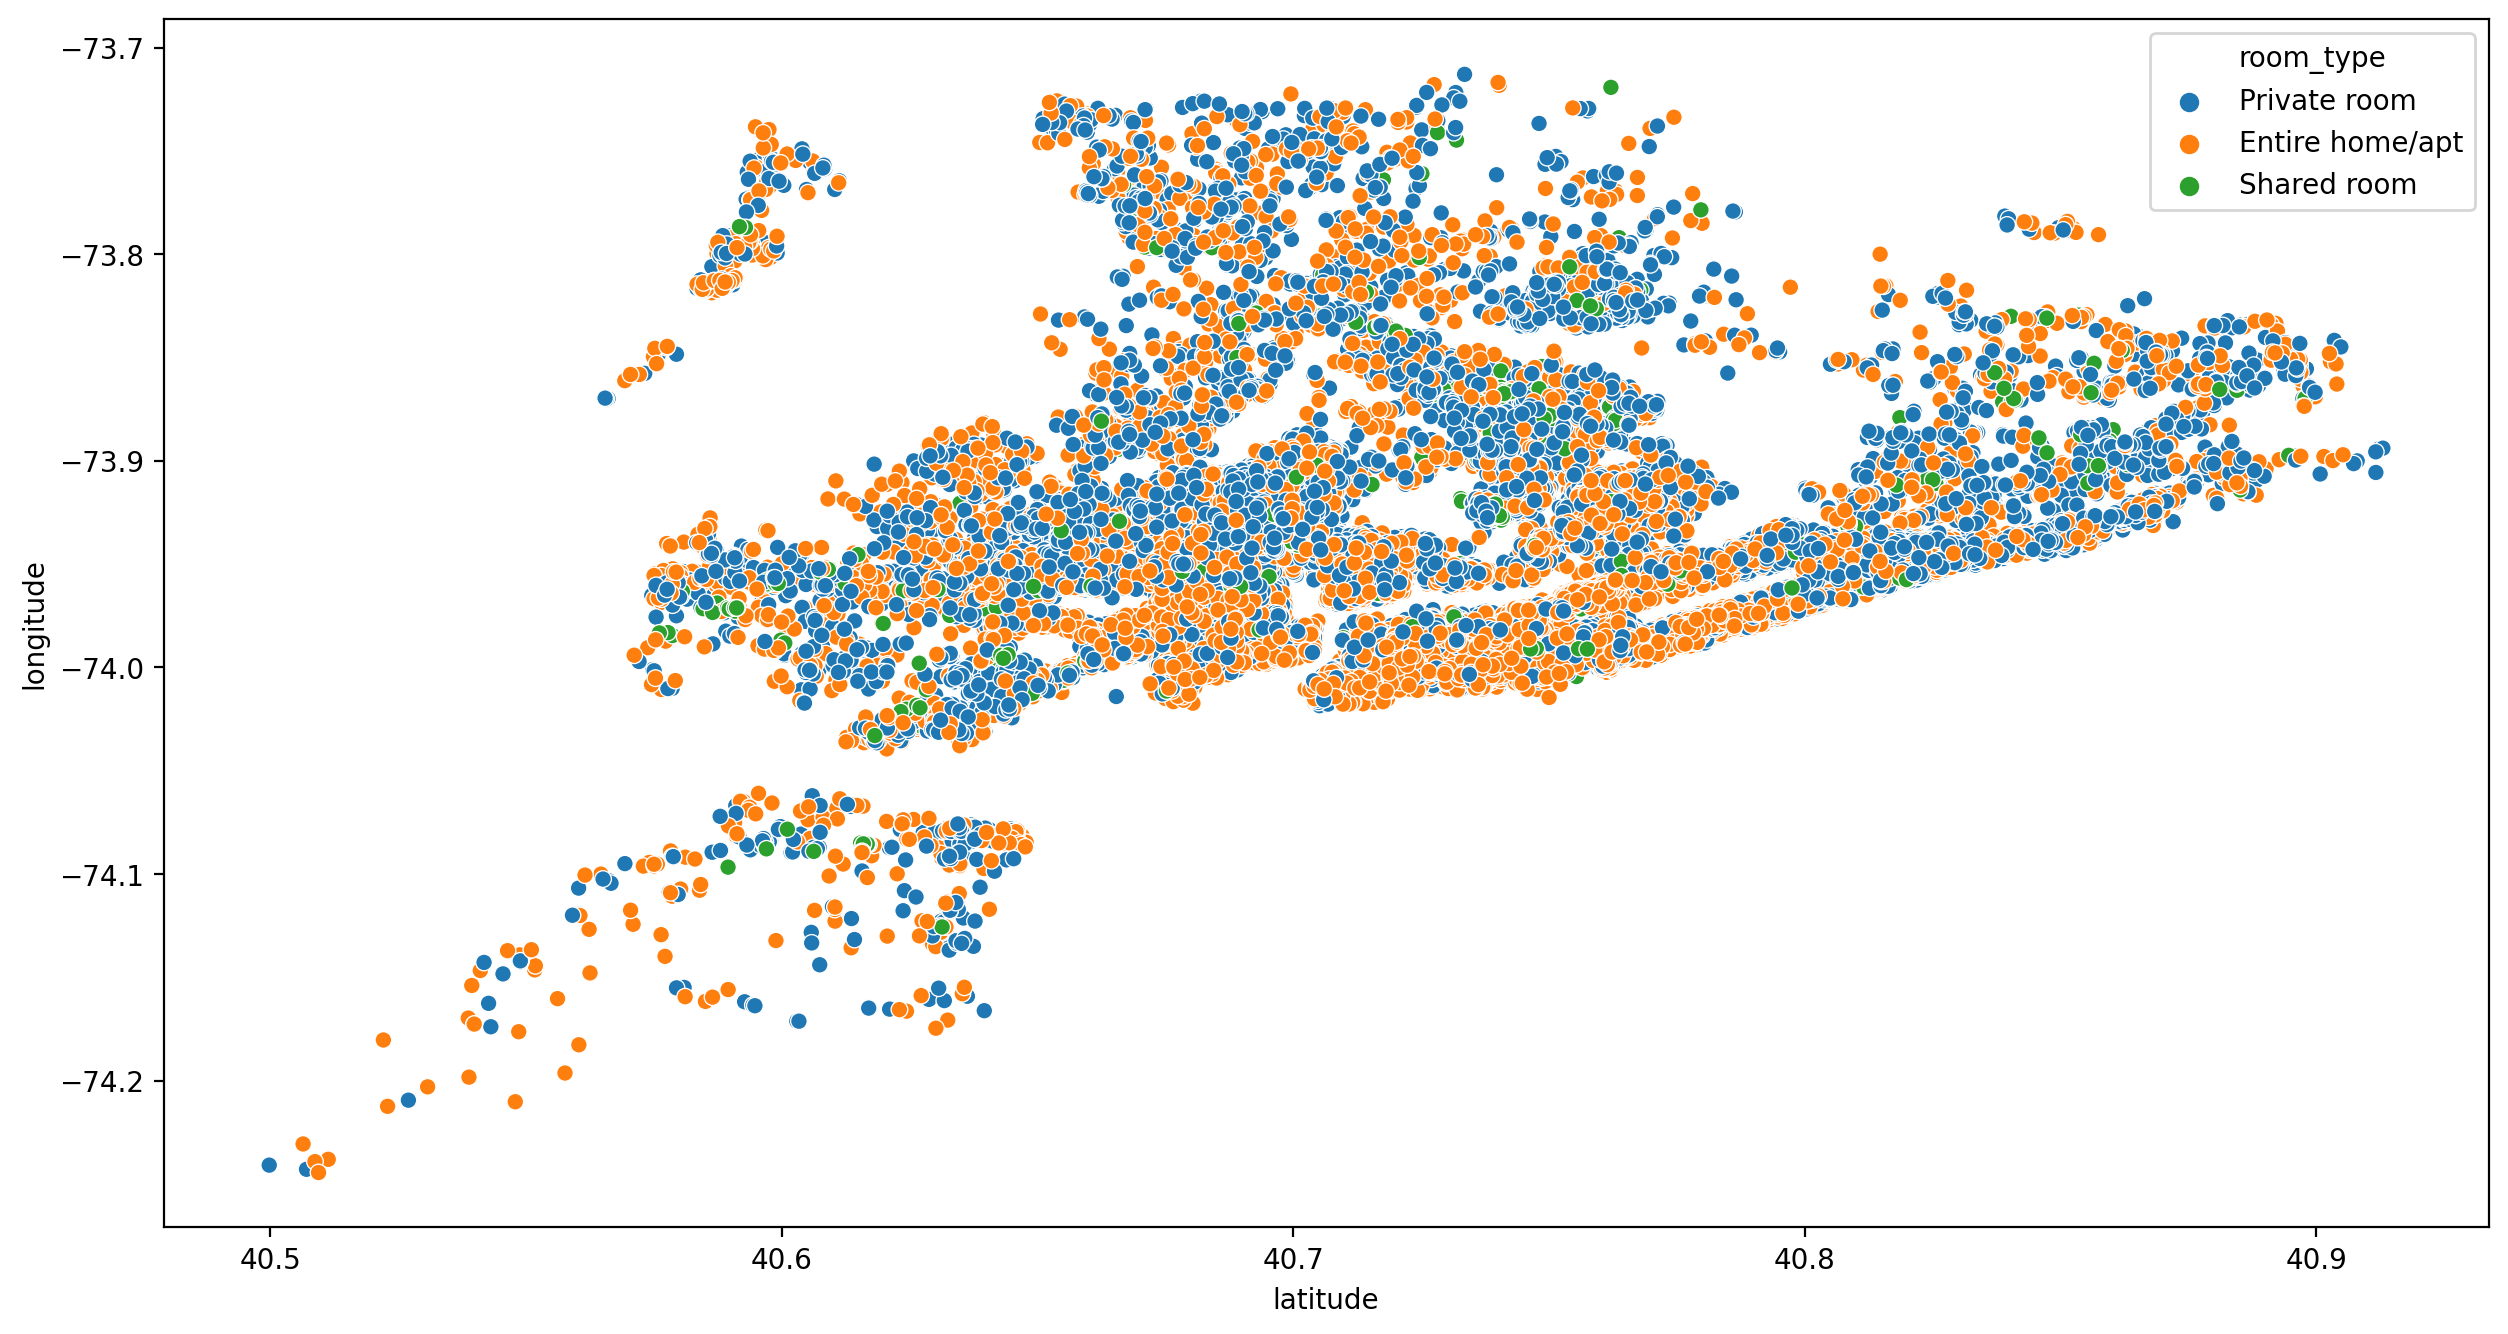

In [17]:
# Visualizing Room Type
plt.figure(figsize=(15,8),dpi = 200)
sns.scatterplot(x = 'latitude',y='longitude',data = df,hue = 'room_type')
plt.show()

In [18]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07 00:00:00,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


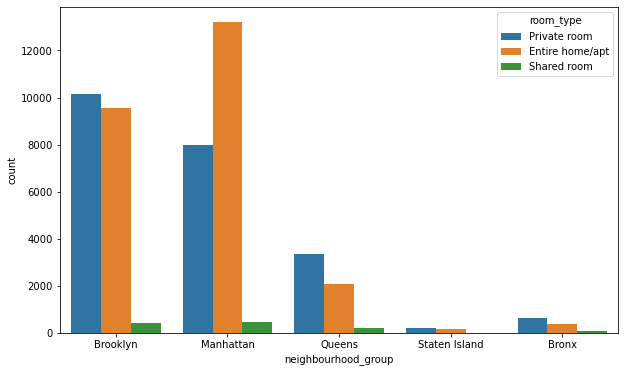

In [19]:
# Neighbourhood_group
plt.figure(figsize=(10,6))
sns.countplot(data = df,x = 'neighbourhood_group',hue = 'room_type')
plt.show()

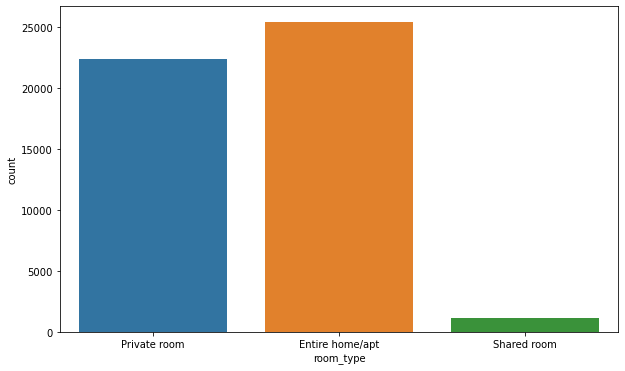

In [20]:
# room type countplot
plt.figure(figsize=(10,6))
sns.countplot(df['room_type'])
plt.show()

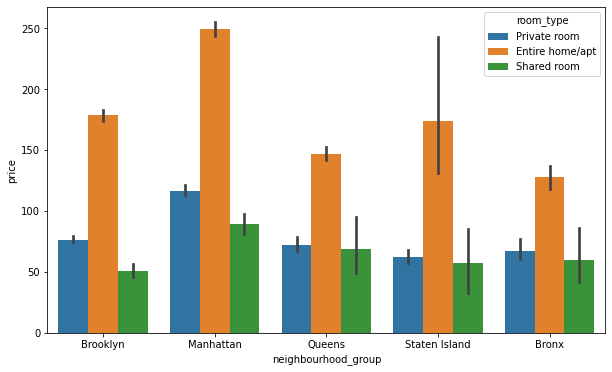

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='neighbourhood_group', y='price',hue='room_type', data=df)
plt.show()

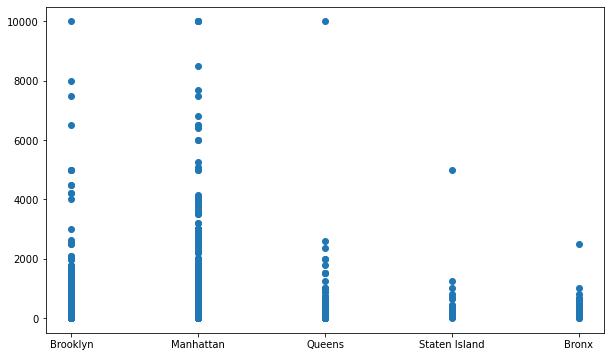

In [22]:
# Price per neighbourhood group
plt.figure(figsize=(10,6))
plt.scatter(x='neighbourhood_group', y='price', data=df )
plt.show()

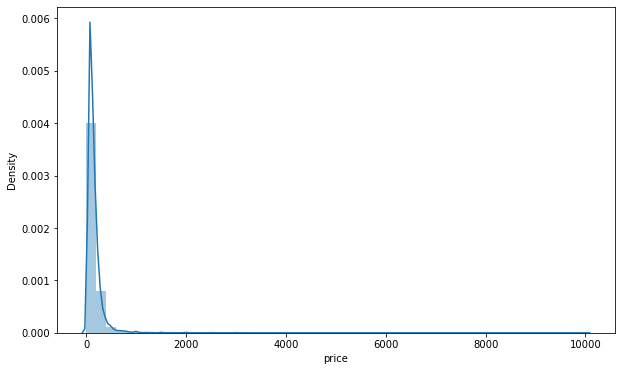

In [23]:
# Price
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
plt.show()

In [24]:
# Since the data is right skewed we can apply log transformation to make it less skewed

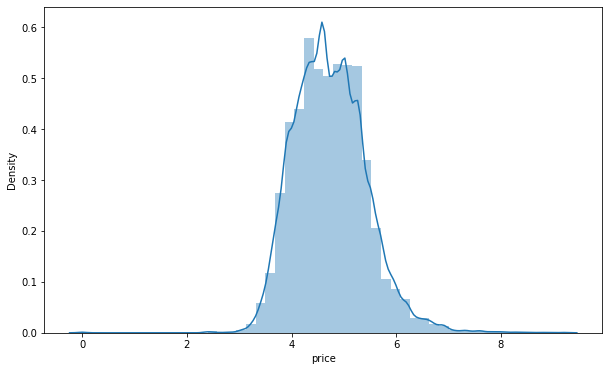

In [25]:
pr= np.log(df.price+1)
plt.figure(figsize = (10,6))
sns.distplot(pr,kde =True)
plt.show()

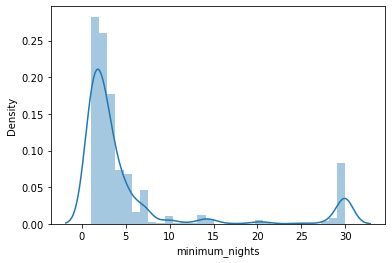

In [26]:
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.show()

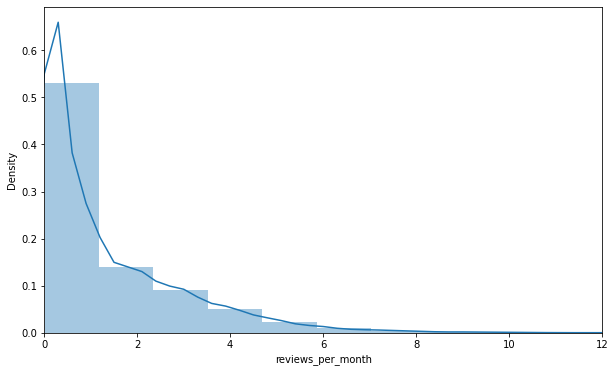

In [27]:
# Visualizing Reviews Per Month
plt.figure(figsize=(10,6))
sns.distplot(df['reviews_per_month'])
plt.xlim([0,12])
plt.show()

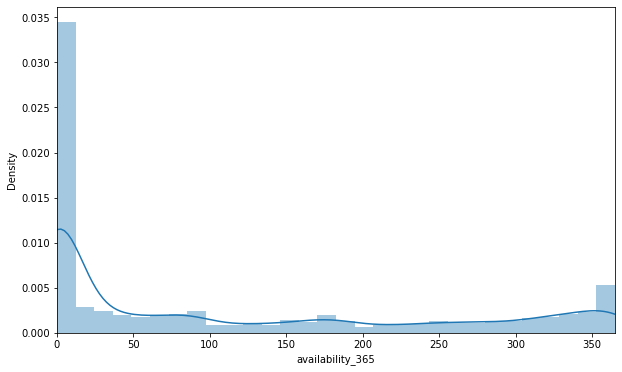

In [28]:
# Visualizing Availability_365
plt.figure(figsize=(10,6))
sns.distplot(df['availability_365'])
plt.xlim([0,365])
plt.show()

In [29]:
# Converting last review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

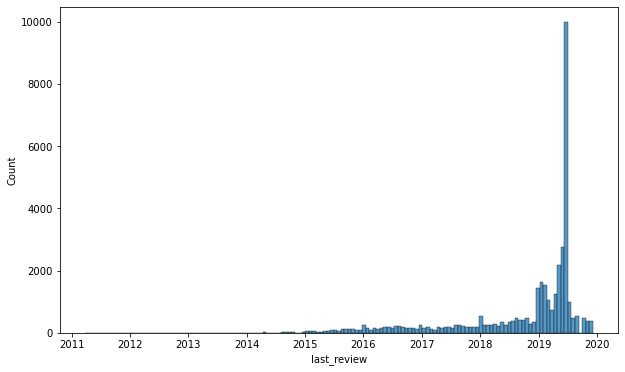

In [30]:
# Visualizing Last Review Column
plt.figure(figsize=(10,6))
sns.histplot(df['last_review'])
plt.show()

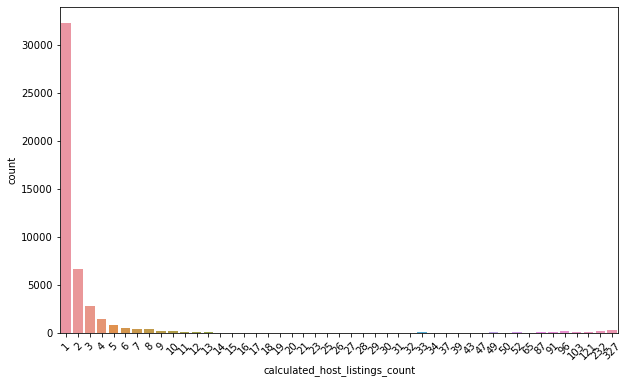

In [31]:
# Visualing calculated_host_listings_count
plt.figure(figsize=(10,6))
sns.countplot(df['calculated_host_listings_count'])
plt.xticks(rotation = 45)
plt.show()

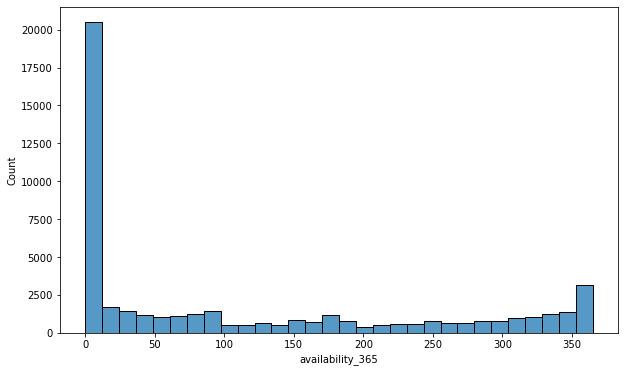

In [32]:
# Visualizing availability_365
plt.figure(figsize=(10,6))
sns.histplot(df['availability_365'])
plt.show()

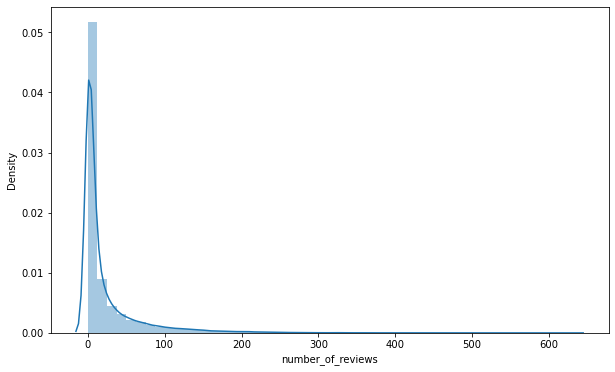

In [33]:
# Visualizing number_of_reviews
plt.figure(figsize=(10,6))
sns.distplot(df['number_of_reviews'])
plt.show()

In [34]:
# Number of reviews seems to be skewed 

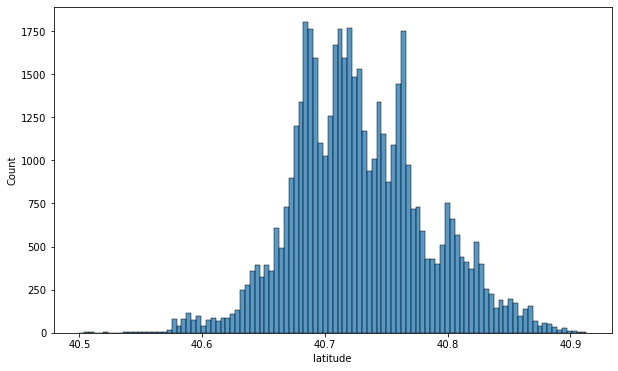

In [35]:
# Visualizing latitude
plt.figure(figsize=(10,6))
sns.histplot(df['latitude'])
plt.show()

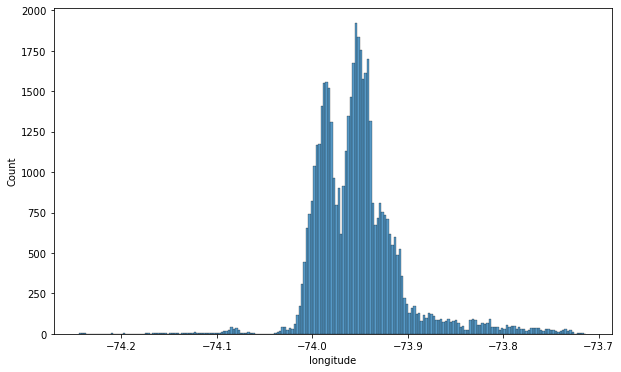

In [36]:
# Visualizing Longitude
plt.figure(figsize=(10,6))
sns.histplot(df['longitude'])
plt.show()

In [37]:
#sns.pairplot(df)

<AxesSubplot:>

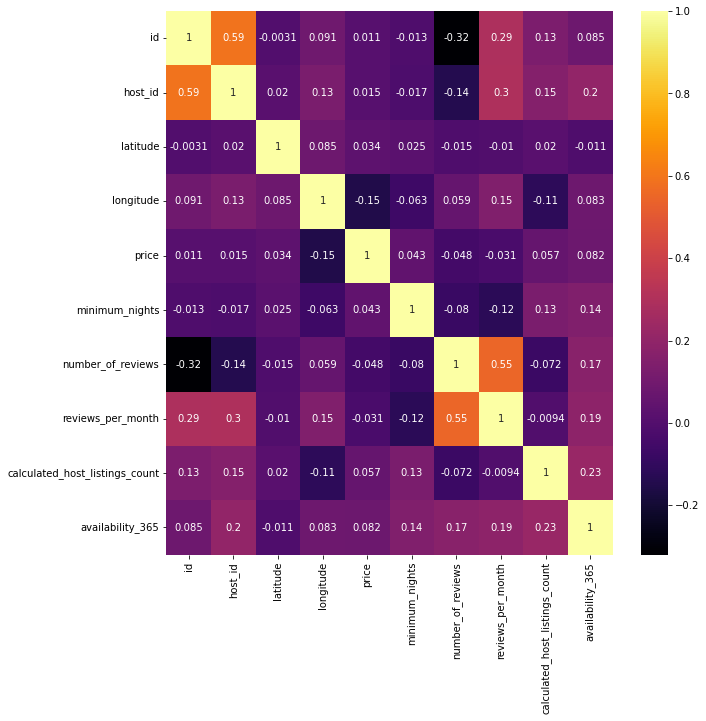

In [38]:
# Checking Correlations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap = 'inferno')

# Feature Engineering

After EDA found couple of columns with less significance & dropping them.

In [39]:
# Dropping non important columns
df.drop(['id','name','host_id','host_name','last_review'],1,inplace=True)

In [40]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [41]:
# Dropping all prices = 0 rows
df[df['price'] == 0].index
df.drop(df[df['price'] == 0].index,axis = 0,inplace = True)

### Handling Categorical columns

In [42]:
# Creating dummy variables for room_type & neighbourhood_group

dummy = pd.get_dummies(df[['room_type','neighbourhood_group']])
df = pd.concat([df,dummy],axis=1)
df.drop(['room_type','neighbourhood_group'],axis=1,inplace=True)
df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0
1,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0
2,Harlem,40.80902,-73.94190,150,3,0,NaN,1,365,0,1,0,0,0,1,0,0
3,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0
4,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0


In [43]:
# # Scaling minimum_night foe 30 days
# df['minimum_nights'] = df['minimum_nights']/30 

In [44]:
# Encoding Neighbourhood 
from sklearn.preprocessing import LabelEncoder

top_50_nghd = list(df['neighbourhood'].value_counts()[:50].index)
df['neighbourhood'] = np.where(df['neighbourhood'].isin(top_50_nghd),df['neighbourhood'],'other')

le = LabelEncoder()
df['neighbourhood'] = le.fit_transform(df['neighbourhood'])
df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,50,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0
1,31,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0
2,23,40.80902,-73.94190,150,3,0,NaN,1,365,0,1,0,0,0,1,0,0
3,6,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0
4,11,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0


In [45]:
df['reviews_per_month'].fillna(0.72,inplace = True)

From EDA we found that our dataset has lot of features that are highly skewed, have outliers, missing values & scaling is required.

In [46]:
# Lets build machine learning models based on this dataset so that we can compare the effect of feature engineering methods 

# Diagnostic Function 

In [47]:
# function to plot a histogram and a Q-Q plot
def diagnostic_plots(df, variable):
    
    
    plt.figure(figsize=(15,6))
    
    plt.suptitle(variable.capitalize())
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],bins=30)
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

# Scoring Function

In [48]:
# Function to return Train & Test r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

def get_score(model,X_train_scaled,y_train,X_test_scaled,y_test):
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    
    print("Training r2_score  = ",round(model.score(X_train_scaled,y_train) * 100,2),'%')
    
    print("Test r2_score      = ",round(model.score(X_test_scaled,y_test)* 100,2),'%')
    
    print("Mean Absolute Error = ",round(mean_absolute_error(y_test,y_pred),2))
    
    print("Mean Squared Error  = ",round(mean_squared_error(y_test,y_pred),2))
    

# Model Building 1

    1. With outlier handling (outlier removal)
    2. With variable transformation - log transformation
    3. Without feature selection
    4. With feature scaling

In [49]:
# Creating a copy from main dataframe
model_build_1 = df.copy()

In [50]:
# Outlier removal function

def remove_outliers(feature):
    """
        Returns truth values for each feature
    """
    
    Q1 = model_build_1[feature].quantile(0.25)
    Q3 = model_build_1[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    
    truth_values = np.where(model_build_1[feature] > UL,True, np.where(model_build_1[feature] < LL, True, False))
        
    return truth_values


availability = remove_outliers('availability_365')
host_listings = remove_outliers('calculated_host_listings_count')
reviews_month = remove_outliers('reviews_per_month')
minimum_nights = remove_outliers('minimum_nights')
no_reviews = remove_outliers('number_of_reviews')
price = remove_outliers('price')

model_build_1 = model_build_1.loc[~(availability+host_listings+reviews_month+minimum_nights+no_reviews+price)]

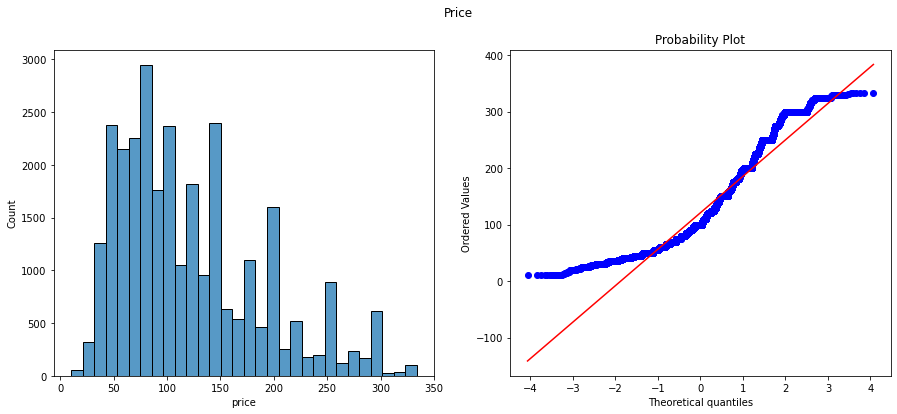

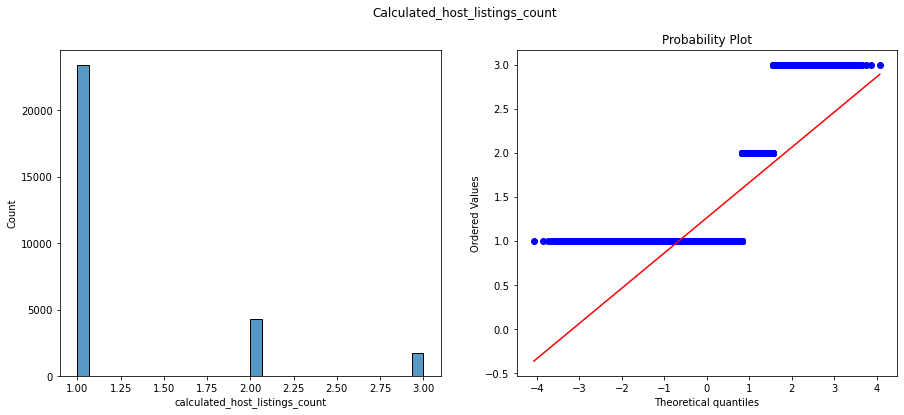

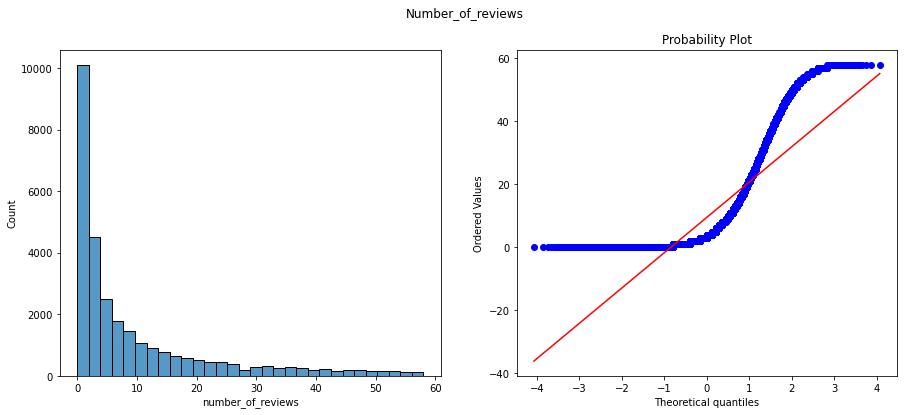

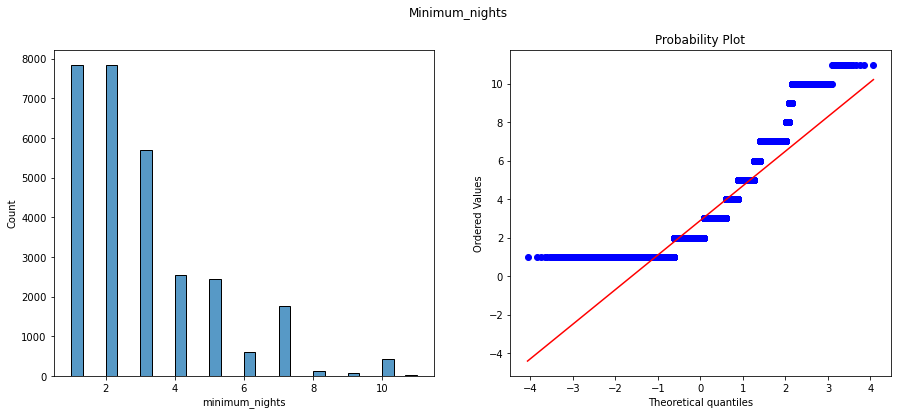

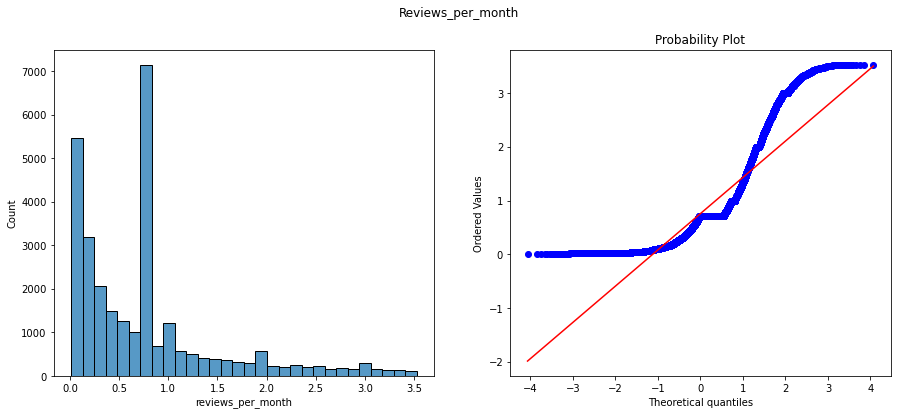

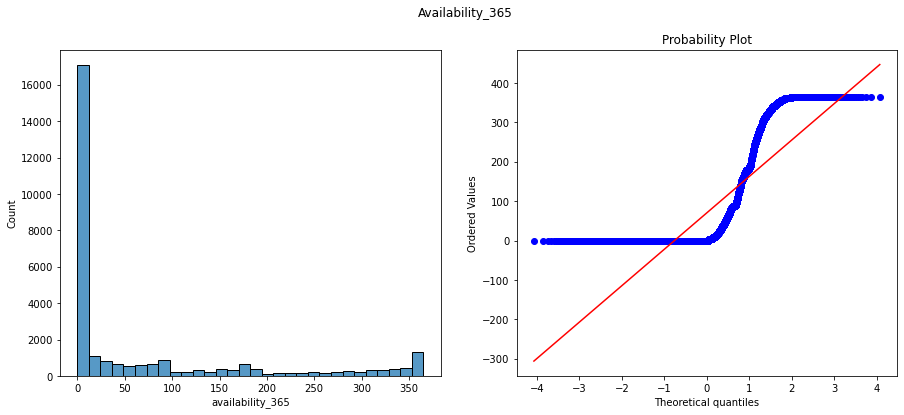

In [51]:
# Distribution of variables before log transformations

trns_f = ['price', 'calculated_host_listings_count','number_of_reviews','minimum_nights','reviews_per_month','availability_365']

for i in trns_f:
    diagnostic_plots(model_build_1,i)

In [52]:
# Applying log transformation to selected columns

trns_f = ['price', 'calculated_host_listings_count','number_of_reviews','minimum_nights','reviews_per_month','availability_365']

for i in trns_f:
    model_build_1[i] = np.log(model_build_1[i]+1)

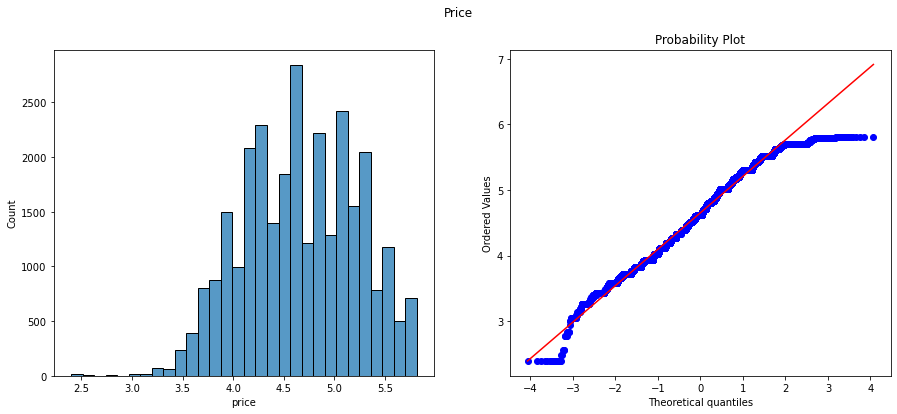

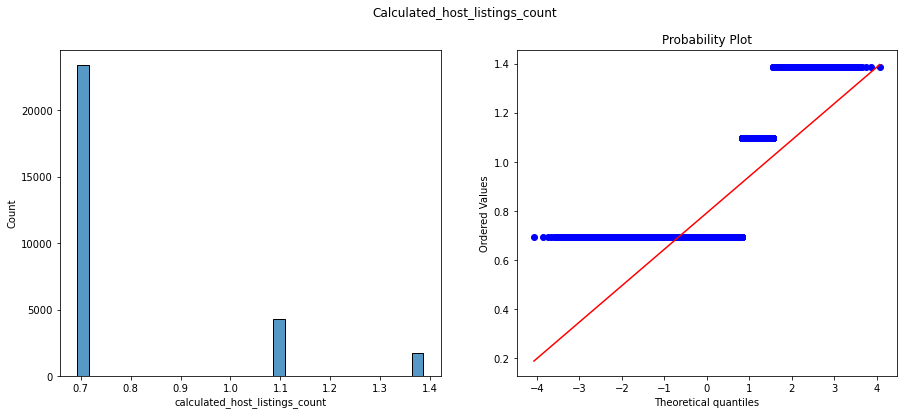

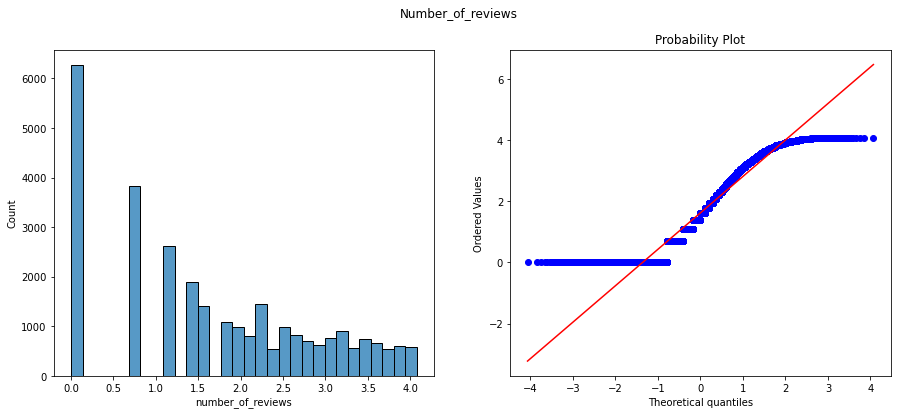

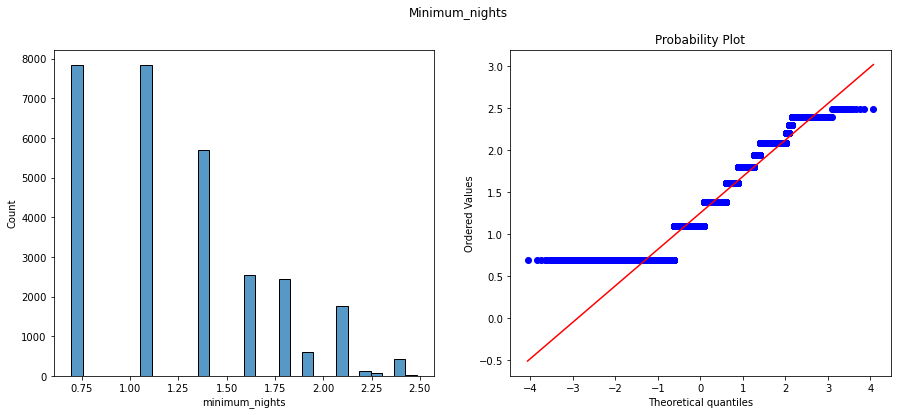

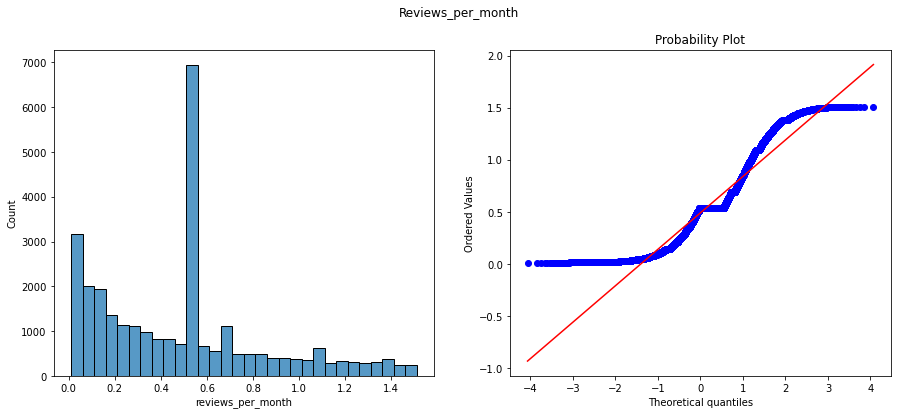

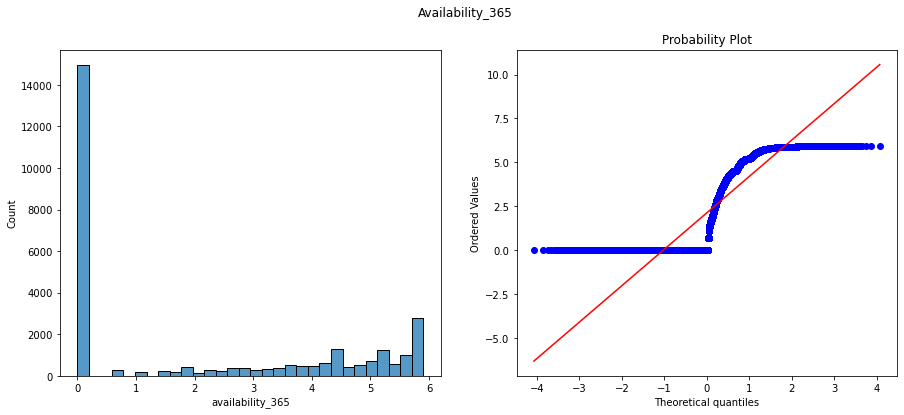

In [53]:
# Distribution of variables after log transformations

for i in trns_f:
    diagnostic_plots(model_build_1,i)

In [54]:
# creating X & y
X = model_build_1.drop('price',1)
y = model_build_1['price']

In [55]:
# creating train test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=101)

In [56]:
# Scaling all the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [57]:
from sklearn.linear_model import LinearRegression
lr_1 = LinearRegression()

get_score(lr_1,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  52.34 %
Test r2_score      =  54.01 %
Mean Absolute Error =  0.3
Mean Squared Error  =  0.14


In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_1 = RandomForestRegressor()

get_score(rf_1,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  94.03 %
Test r2_score      =  59.49 %
Mean Absolute Error =  0.28
Mean Squared Error  =  0.13


In [59]:
ridge_1 = RidgeCV(alphas= [1000, 100, 50, 20, 10, 1, 0.1, 0.01])

get_score(ridge_1,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  52.34 %
Test r2_score      =  54.01 %
Mean Absolute Error =  0.3
Mean Squared Error  =  0.14


In [60]:
from sklearn.tree import DecisionTreeRegressor

dt_1 = DecisionTreeRegressor(max_depth=6)

get_score(dt_1,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  57.32 %
Test r2_score      =  57.16 %
Mean Absolute Error =  0.29
Mean Squared Error  =  0.13


In [61]:
from sklearn.ensemble import AdaBoostRegressor

ada_1 = AdaBoostRegressor()
get_score(ada_1,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  50.19 %
Test r2_score      =  50.7 %
Mean Absolute Error =  0.31
Mean Squared Error  =  0.15


In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_1 = GradientBoostingRegressor()
get_score(gbr_1,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  60.12 %
Test r2_score      =  60.44 %
Mean Absolute Error =  0.28
Mean Squared Error  =  0.12


In [63]:
from xgboost import XGBRFRegressor

xgb_1 = XGBRFRegressor()
get_score(xgb_1,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  58.94 %
Test r2_score      =  58.52 %
Mean Absolute Error =  0.28
Mean Squared Error  =  0.13


<pre>
    <h1><center>Observations Model Building 1:</center></h1>
    ! Outlier removal increased the overall accuracies for all the algorithms
    !! Log transformation boosted accuracies from 15% to 60%
    !!! Top 3 test scores:
        1. GradientBoostingRegressor 60.44
        2. RandomForestRegressor 59.48
        3. XGBRFRegressor 58.52
<pre>

<h1>________________________________________________________________</h1>

<h1><center>Model Building 2</center></h1>
<pre>
    1. With outlier handling (outlier capping)
    2. With feature transformation Yeo-Johnson
    3. Without feature selection
    4. With feature scaling
    5. With missing value imputation with median
</pre>

In [64]:
# Creating a copy from main dataframe
model_build_2 = df.copy()

In [65]:
model_build_2.shape

(48884, 17)

In [66]:
model_build_2 = model_build_2[(model_build_2['number_of_reviews'] > 10) & (model_build_2['number_of_reviews'] <150)]

In [67]:
model_build_2.shape

(17196, 17)

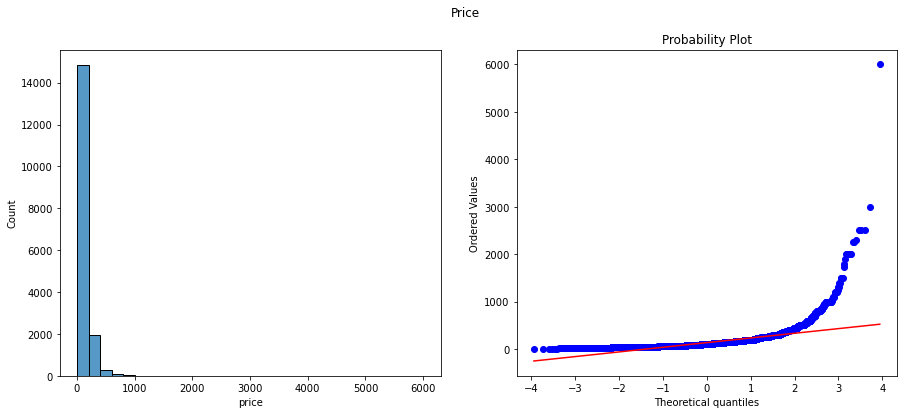

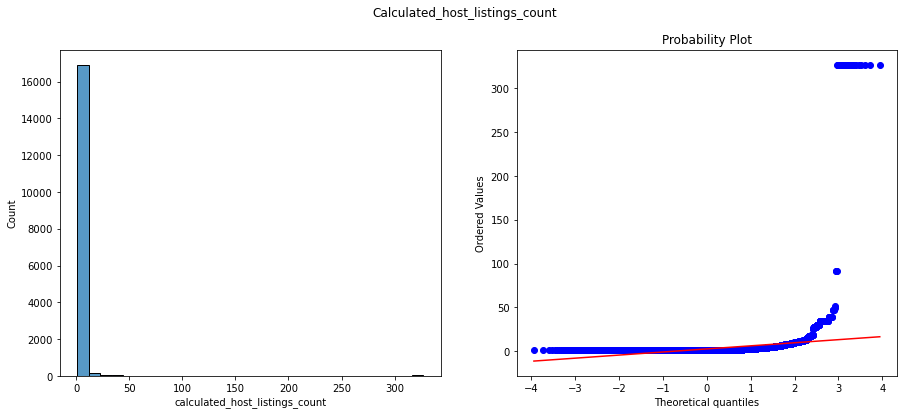

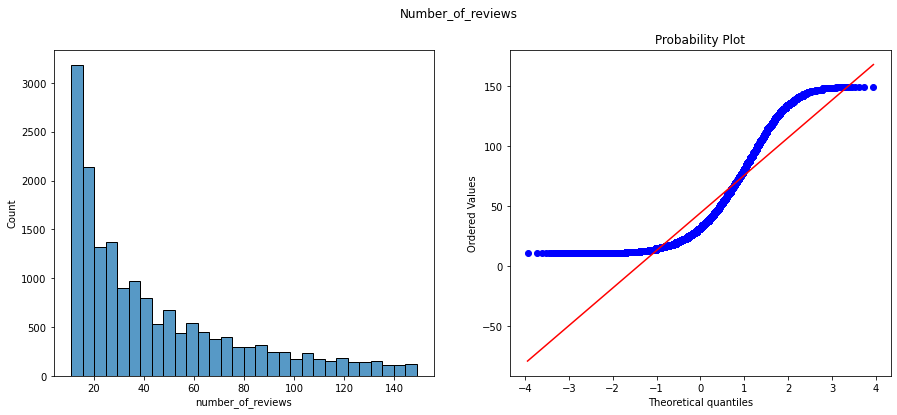

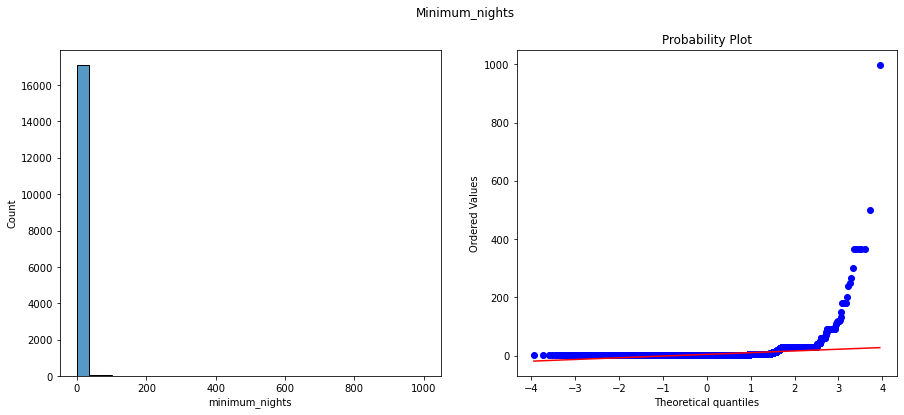

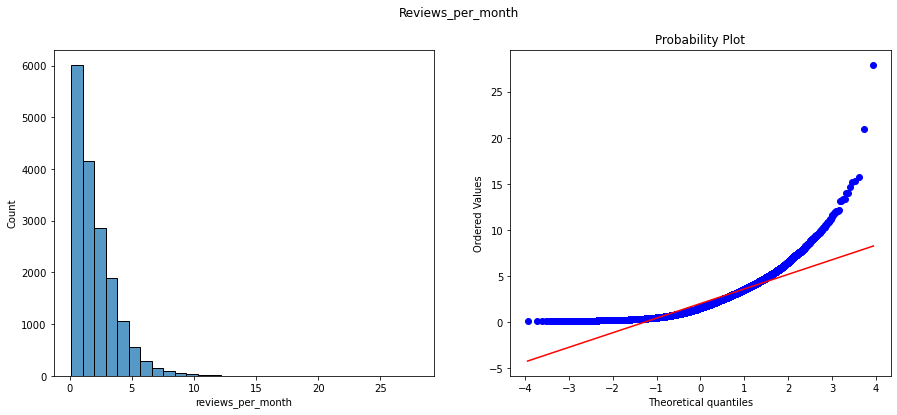

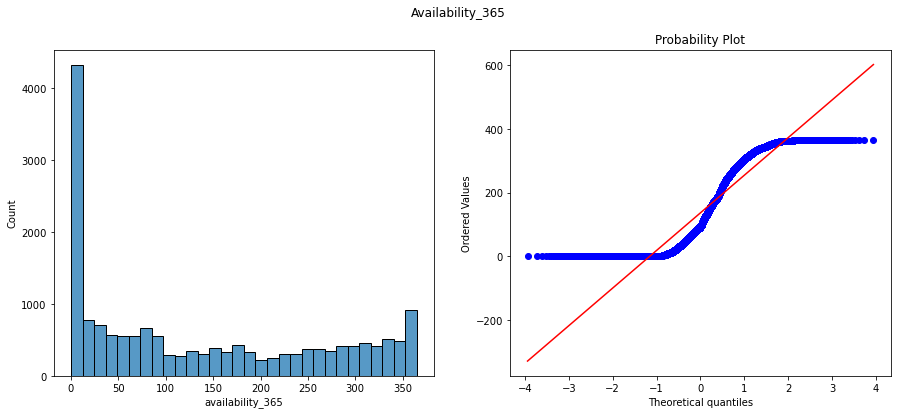

In [68]:
# Distribution of variables before log transformation

for i in trns_f:
    diagnostic_plots(model_build_2,i)

In [69]:
# Transforming list of columns
from scipy import stats

trns_f = ['price', 'calculated_host_listings_count','number_of_reviews','minimum_nights','reviews_per_month','availability_365']

for i in trns_f:
    model_build_2[i],lam = stats.yeojohnson(model_build_2[i])
   
    
model_build_2.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
1,31,40.75362,-73.98377,3.084839,0.506947,2.660795,0.304314,0.422406,17.150350,1,0,0,0,0,1,0,0
5,33,40.74767,-73.97500,3.051044,0.768423,2.874552,0.427497,0.361037,11.600791,1,0,0,0,0,1,0,0
6,1,40.68688,-73.95596,2.649636,1.019924,2.698773,0.317112,0.361037,0.000000,0,1,0,0,1,0,0,0
8,45,40.80178,-73.96723,2.750902,0.680342,3.057822,0.610367,0.361037,0.000000,0,1,0,0,0,1,0,0
10,45,40.80316,-73.96545,2.931558,0.857857,2.733261,0.335851,0.361037,2.690821,1,0,0,0,0,1,0,0


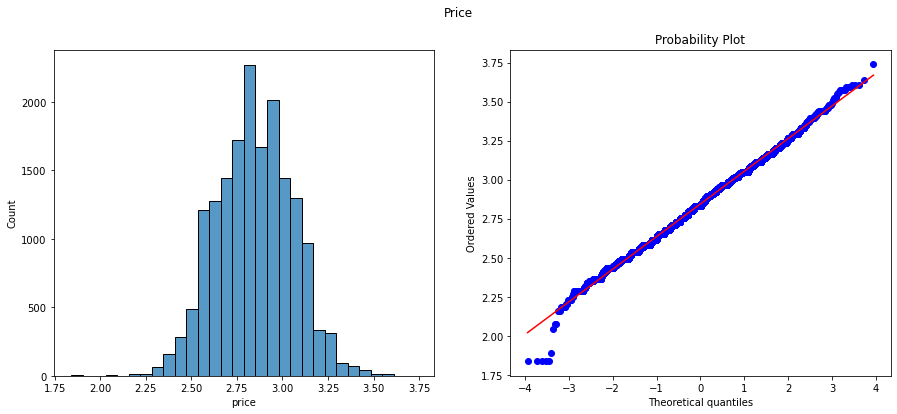

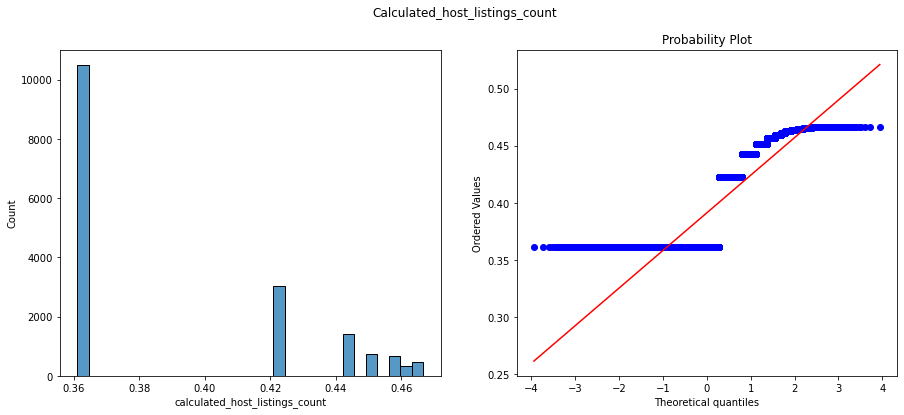

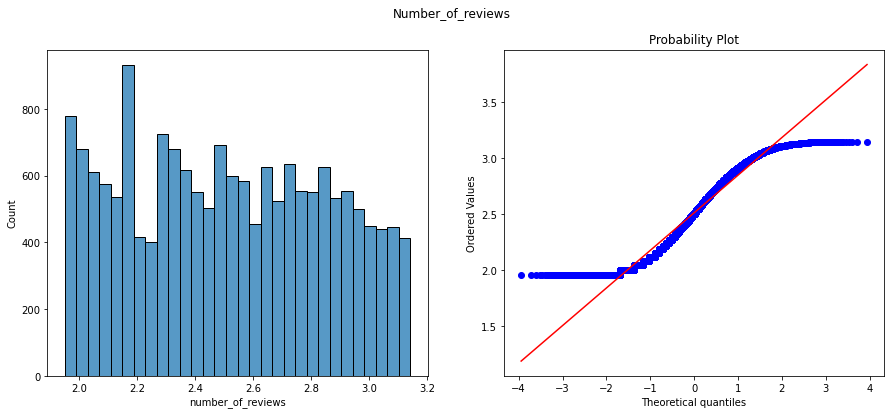

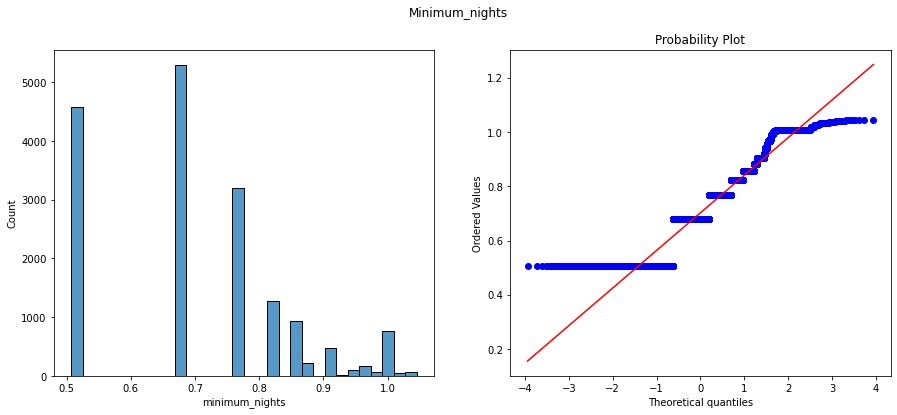

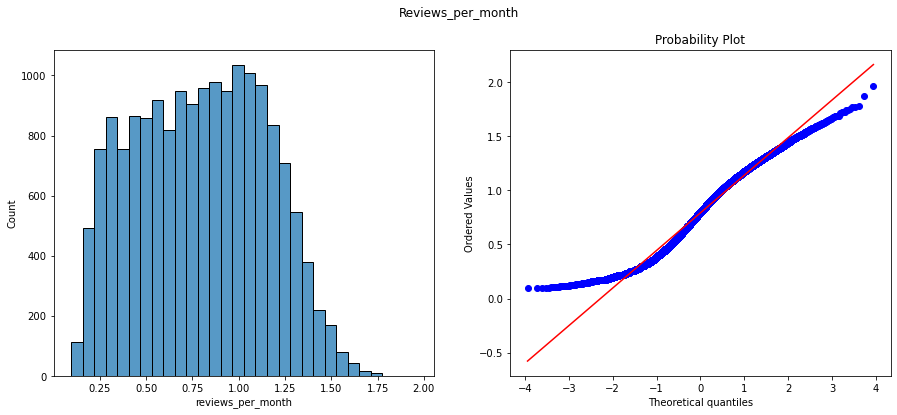

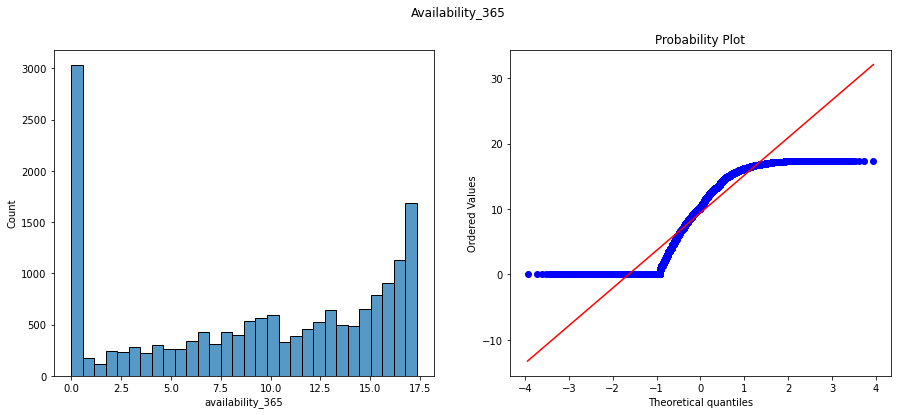

In [70]:
# Distribution of variables after log transformation

for i in trns_f:
    diagnostic_plots(model_build_2,i)

In [ ]:
Q3 = df[variable].quantile(0.75)
Q1 = df[variable].quantile(0.25)

IQR = Q3 - Q1

UL = Q3 + 1.5*IQR 
LL = Q1 - 1.5*IQR 

In [71]:
#capping outliers

global model_build_2

def cap_outliers(feature):
    UL = model_build_2[feature].quantile(0.85)
    LL = model_build_2[feature].quantile(0.15)
    
    return np.where(model_build_2[feature] > UL, UL,np.where(model_build_2[feature] < LL,LL,model_build_2[feature]))

trns_f = ['price', 'calculated_host_listings_count','number_of_reviews','minimum_nights','reviews_per_month','availability_365']
for i in trns_f:
    model_build_2[i] = cap_outliers(i)

In [72]:
# creating X & y
X = model_build_2.drop(['price'],1)
y = model_build_2['price']

In [73]:
# creating train test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=454)

In [74]:
# Scaling all the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [75]:
from sklearn.ensemble import RandomForestRegressor

rf_2 = RandomForestRegressor(max_depth=14,random_state = 101)
get_score(rf_2,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  90.01 %
Test r2_score      =  70.85 %
Mean Absolute Error =  0.07
Mean Squared Error  =  0.01


In [76]:
ridge_2 = RidgeCV(alphas= [1000, 100, 50, 20, 10, 1, 0.1, 0.01])

get_score(ridge_2,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  60.4 %
Test r2_score      =  62.85 %
Mean Absolute Error =  0.08
Mean Squared Error  =  0.01


In [77]:
from sklearn.tree import DecisionTreeRegressor

dt_2 = DecisionTreeRegressor(max_depth=6)
get_score(dt_2,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  67.2 %
Test r2_score      =  67.7 %
Mean Absolute Error =  0.07
Mean Squared Error  =  0.01


In [78]:
from sklearn.ensemble import AdaBoostRegressor

ada_2 = AdaBoostRegressor()
get_score(ada_2,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  61.72 %
Test r2_score      =  62.45 %
Mean Absolute Error =  0.08
Mean Squared Error  =  0.01


In [79]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_2 = GradientBoostingRegressor()
get_score(gbr_2,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  69.05 %
Test r2_score      =  69.93 %
Mean Absolute Error =  0.07
Mean Squared Error  =  0.01


In [80]:
from xgboost import XGBRFRegressor

xgb_2 = XGBRFRegressor()
get_score(xgb_2,X_train_scaled,y_train,X_test_scaled,y_test)

Training r2_score  =  68.52 %
Test r2_score      =  68.98 %
Mean Absolute Error =  0.07
Mean Squared Error  =  0.01


<h1><center>Observation - Model Building 2</center></h1>
<pre>
! Outlier capping & Yeo-Johnson Transformation increased the overall accuracies for all the algorithms
!! This model is performing the better from Model 3 as test accuracy increased by 8%
!!! Top 3 scores: 
    1. RandomForestRegressor 70.8
    2. GradientBoostingRegressor 69.93
    3. XGBRFRegressor 68.98
</pre>

# Model Building 3

In [81]:
# Using PIPELINE, CrossValidation, RandomSearchCV

In [82]:
# Creating a copy from main dataframe
model_build_3 = df.copy()

In [83]:
model_build_3 = model_build_3[(model_build_3['number_of_reviews'] > 10) & ((model_build_3['number_of_reviews'] <150))]

In [84]:
global model_build_3

def cap_outliers(feature):
    UL = model_build_3[feature].quantile(0.80)
    LL = model_build_3[feature].quantile(0.20)
    
    return np.where(model_build_3[feature] > UL, UL,np.where(model_build_3[feature] < LL,LL,model_build_3[feature]))

trns_f = ['price', 'calculated_host_listings_count','number_of_reviews','minimum_nights','reviews_per_month','availability_365']
for i in trns_f:
    model_build_3[i] = cap_outliers(i)

In [85]:
from scipy import stats

trns_f = ['price', 'calculated_host_listings_count','number_of_reviews','minimum_nights','reviews_per_month','availability_365']

for i in trns_f:
    model_build_3[i], lam = stats.yeojohnson(model_build_3[i])

In [86]:
X = model_build_3.drop('price',1)
y = model_build_3['price']

In [87]:
# creating train test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=101)

In [88]:
# Scaling all the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [89]:
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

In [90]:
rf = RandomForestRegressor()

param_grid = {
              'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20, 21, 22, 23, 24],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf_cv = RandomizedSearchCV(rf,
                          param_grid,
                          n_jobs=-1,
                          cv=2,
                          return_train_score=True,
                          verbose=1)

rf_cv.fit(X_train_scaled,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [7, 8, 9, 10, 11, 12, 13,
                                                      14, 15, 16, 17, 18, 19,
                                                      20, 21, 22, 23, 24],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   return_train_score=True, verbose=1)

In [91]:
rf_cv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 14}

In [92]:
rf_cv.best_score_

0.679320196729269

In [93]:
rf_3 = RandomForestRegressor(n_estimators=400,
                           min_samples_split=2,
                           min_samples_leaf= 2,
                           max_features='sqrt',
                           max_depth=14)

rf_3.fit(X_train_scaled,y_train)
print(rf_3.score(X_train_scaled,y_train) * 100)
print(rf_3.score(X_test_scaled,y_test)* 100)

84.64096301629861
67.24647243495299


# Model Building 4 Using feature engine library

In [94]:
# Creating a copy from main dataframe
model_build_4 = df.copy()

In [95]:
X = model_build_4.drop('price',1)
y = np.log(model_build_4['price'])

In [96]:
model_build_4 = model_build_4[(model_build_4['number_of_reviews'] > 10) & ((model_build_4['number_of_reviews'] <150))]

In [97]:
# creating train test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=101)

In [98]:
from feature_engine  import outliers as win
from feature_engine import transformation as yjt
from feature_engine.imputation import MeanMedianImputer
from sklearn.pipeline import Pipeline

In [99]:
# Using pipeline to create model training & testing for randomforest regressor 
pipe_rf = Pipeline([('ol_handle',win.Winsorizer()),
                     ('vt',yjt.YeoJohnsonTransformer(variables=[ 'calculated_host_listings_count', 
                                                                 'number_of_reviews', 
                                                                 'minimum_nights',
                                                                 'reviews_per_month',
                                                                 'availability_365'])),
                     ('sacler',MinMaxScaler()),
                     ('rf',RandomForestRegressor(max_depth=15))
                     ])

param = {}

rf_cv = RandomizedSearchCV(pipe_rf,
                           param_distributions=param,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2')

rf_cv.fit(X_train,y_train)

#pipe_rf.score(X_train,y_train)

print("train Score",rf_cv.best_score_)

print("Test score",rf_cv.score(X_test,y_test))

train Score 0.5988110530960343
Test score 0.6167419954897939


In [100]:
# Using pipeline to create model training & testing for randomforest regressor 
pipe_xg = Pipeline([('ol_handle',win.Winsorizer()),
                     ('vt',yjt.YeoJohnsonTransformer(variables=[ 'calculated_host_listings_count', 
                                                                 'number_of_reviews', 
                                                                 'minimum_nights',
                                                                 'reviews_per_month',
                                                                 'availability_365'])),
                     ('scaler',MinMaxScaler()),
                     ('xg',XGBRFRegressor())
                     ])

param = {}

xg_cv = RandomizedSearchCV(pipe_xg,
                           param_distributions=param,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2')

xg_cv.fit(X_train,y_train)

#pipe_rf.score(X_train,y_train)

print("train Score",xg_cv.best_score_)

print("Test score",xg_cv.score(X_test,y_test))

train Score 0.5553417004515497
Test score 0.5689471522947029


In [101]:
# Using pipeline to create model training & testing for randomforest regressor 
pipe_gbr = Pipeline([('ol_handle',win.Winsorizer()),
                     ('vt',yjt.YeoJohnsonTransformer(variables=[ 'calculated_host_listings_count', 
                                                                 'number_of_reviews', 
                                                                 'minimum_nights',
                                                                 'reviews_per_month',
                                                                 'availability_365'])),
                     ('scaler',MinMaxScaler()),
                     ('gbr',GradientBoostingRegressor())
                     ])

param = {}

gbr_cv = RandomizedSearchCV(pipe_gbr,
                           param_distributions=param,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2')

gbr_cv.fit(X_train,y_train)

#pipe_rf.score(X_train,y_train)

print("train Score",gbr_cv.best_score_)

print("Test score",gbr_cv.score(X_test,y_test))

train Score 0.5805701907019823
Test score 0.59985687061311


In [102]:
# Feature Selection

In [103]:
# creating a dataframe of feature importances
fi_ = pd.DataFrame(data = [rf_2.feature_importances_,X_test_scaled.columns]).transpose()
fi_.columns = ['importance','feature']
fi_['importance'] = fi_['importance']*100
fi_

,importance,feature
0,1.551679,neighbourhood
1,12.305976,latitude
2,14.280456,longitude
3,1.847568,minimum_nights
4,3.342983,number_of_reviews
5,3.885636,reviews_per_month
6,1.260878,calculated_host_listings_count
7,5.186044,availability_365
8,52.914249,room_type_Entire home/apt
9,0.307749,room_type_Private room


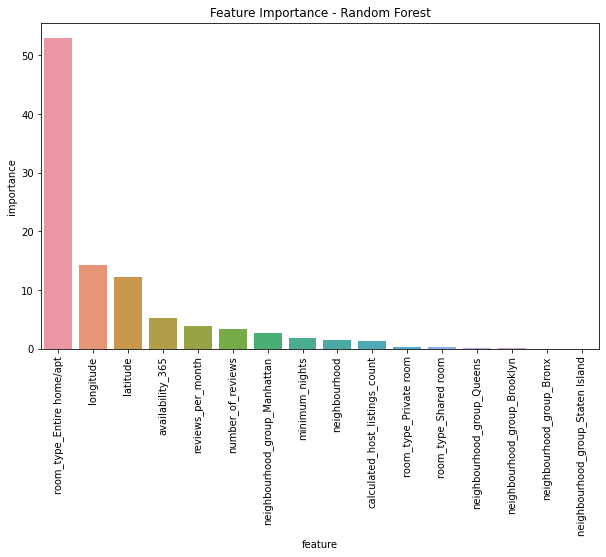

Top 5 features

	 1 Room_type_entire home/apt 

	 2 Longitude 

	 3 Latitude 

	 4 Availability_365 

	 5 Reviews_per_month 

	 6 Number_of_reviews 

	 7 Neighbourhood_group_manhattan 

	 8 Minimum_nights 

	 9 Neighbourhood 

	 10 Calculated_host_listings_count 



In [104]:
list_features = list(fi_.sort_values(by = 'importance', ascending=False)['feature'])

# Top features 
plt.figure(figsize = (10,6))
sns.barplot(x = fi_['feature'], y = fi_['importance'], order=list_features)
plt.title('Feature Importance - Random Forest')
plt.xticks(rotation = 90)
plt.show()

print("Top 5 features\n")
for i,j  in enumerate(list_features[:10]):
    print("\t",i+1,j.capitalize(),"\n")

In [105]:
# creating a dataframe of feature importances for decision tree
fi_2 = pd.DataFrame(data = [dt_2.feature_importances_,X_test_scaled.columns]).transpose()
fi_2.columns = ['importance','feature']
fi_2['importance'] = fi_2['importance']*100
fi_2

,importance,feature
0,1.029014,neighbourhood
1,8.509711,latitude
2,8.40348,longitude
3,0.089942,minimum_nights
4,0.173294,number_of_reviews
5,0.438973,reviews_per_month
6,0.002321,calculated_host_listings_count
7,1.653229,availability_365
8,72.556496,room_type_Entire home/apt
9,0.55229,room_type_Private room


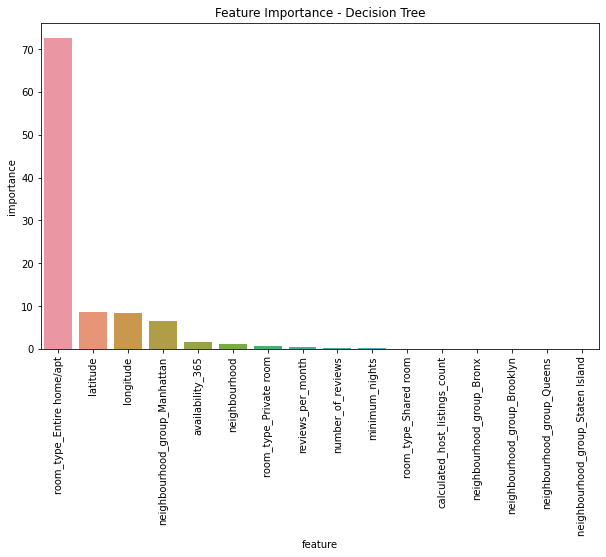

In [106]:
list_features_2 = list(fi_2.sort_values(by = 'importance', ascending=False)['feature'])

# Top features 
plt.figure(figsize = (10,6))
sns.barplot(x = fi_2['feature'], y = fi_2['importance'], order=list_features_2)
plt.title('Feature Importance - Decision Tree')
plt.xticks(rotation = 90)
plt.show()

In [1]:
li = [-1,-2,0,1,2]

In [2]:
sum_pos = 0
sum_neg = 0
for i in li:
    if i < 0:
        sum_neg = sum_neg + i
    else:
        sum_pos = sum_pos + i

In [3]:
sum_neg

-3